In [62]:
# extract first paragraph from a single report and throw into NLP
from bs4 import BeautifulSoup
import requests
import json 
from time import strptime

reportNum = 500

# load JSON file
with open('whoDiseaseOutbreaks.json') as json_data:
    jsonData = json.load(json_data)
    entry = jsonData[reportNum]    
    
# scrape report first paragraph
url = 'https://www.who.int/' + entry["link"]
response = requests.get(url, timeout=10)
content = BeautifulSoup(response.content,"html.parser")

test = content.find('div', attrs={"id": "primary"})
test = test.find_all('p')
firstParagraph = test[1].text
print(firstParagraph) # excluding metadata


On 23 May 2019, WHO received notification through the Global Polio Laboratory Network (GPLN) of the detection of circulating vaccine-derived poliovirus type 2 (cVDPV2) from an environmental sample collected on 20 April 2019 in a hospital in Northern Cameroon which borders Borno state in Nigeria and Chad.  In this region, the vaccine coverage in 2018 for inactivated poliovirus vaccine (IPV1) and oral poliovirus vaccine (OPV3) was 73% and 72% respectively. The virus was detected in an environmental sample only – no associated cases of paralysis have been detected so far.


In [63]:
# save to .txt
file1 = open("whoReportScrapingSingle.txt","w") 
file1.write(firstParagraph)
file1.close()

In [73]:
# try NLTK
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [64]:
# convert into tokens
tokens = [t for t in firstParagraph.split()]

['On', '23', 'May', '2019,', 'WHO', 'received', 'notification', 'through', 'the', 'Global', 'Polio', 'Laboratory', 'Network', '(GPLN)', 'of', 'the', 'detection', 'of', 'circulating', 'vaccine-derived', 'poliovirus', 'type', '2', '(cVDPV2)', 'from', 'an', 'environmental', 'sample', 'collected', 'on', '20', 'April', '2019', 'in', 'a', 'hospital', 'in', 'Northern', 'Cameroon', 'which', 'borders', 'Borno', 'state', 'in', 'Nigeria', 'and', 'Chad.', 'In', 'this', 'region,', 'the', 'vaccine', 'coverage', 'in', '2018', 'for', 'inactivated', 'poliovirus', 'vaccine', '(IPV1)', 'and', 'oral', 'poliovirus', 'vaccine', '(OPV3)', 'was', '73%', 'and', '72%', 'respectively.', 'The', 'virus', 'was', 'detected', 'in', 'an', 'environmental', 'sample', 'only', '–', 'no', 'associated', 'cases', 'of', 'paralysis', 'have', 'been', 'detected', 'so', 'far.']


On:1
23:1
May:1
2019,:1
WHO:1
received:1
notification:1
Global:1
Polio:1
Laboratory:1
Network:1
(GPLN):1
detection:1
circulating:1
vaccine-derived:1
poliovirus:3
type:1
2:1
(cVDPV2):1
environmental:2
sample:2
collected:1
20:1
April:1
2019:1
hospital:1
Northern:1
Cameroon:1
borders:1
Borno:1
state:1
Nigeria:1
Chad.:1
In:1
region,:1
vaccine:3
coverage:1
2018:1
inactivated:1
(IPV1):1
oral:1
(OPV3):1
73%:1
72%:1
respectively.:1
The:1
virus:1
detected:2
–:1
associated:1
cases:1
paralysis:1
far.:1


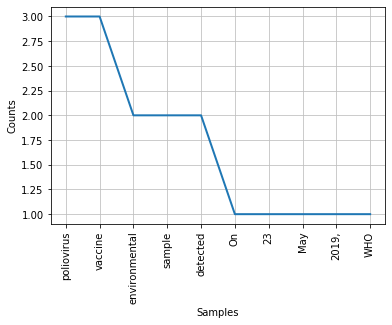

In [86]:
from nltk.corpus import stopwords
sr = stopwords.words('english')
clean_tokens = tokens[:]
for token in tokens:
    if token in stopwords.words('english'):
        
        clean_tokens.remove(token)
freq = nltk.FreqDist(clean_tokens)
for key,val in freq.items():
    print(str(key) + ':' + str(val))
freq.plot(10, cumulative=False)